# Cutoff for the solar atmosphere using the VALIIIc Model

##Background - the problem



	

Compute the atmospheric cut-off frequenccy (From Roberts 2004)

$$ \omega_{c}=\frac{\gamma g}{4\pi c_{s}}\sqrt{1+2\frac{d}{dz}\frac{P}{\rho g}}$$

The atmospheric scale parameter 

Read VAL IIc data from csv file

column 1 height [m]
Column 2 Temperature [K]
Column 3 Density [kg/m^3]
Column 4 Pressure [Pa]


(2048L, 4L)
[ 6.20960377  6.20920411  6.20880509 ...,  3.76641285  3.76641285
  3.76641285]


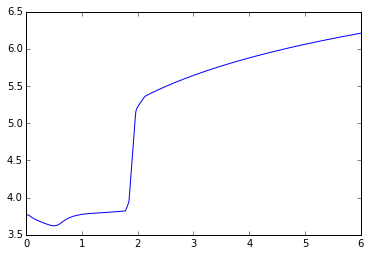

In [2]:
import numpy as numpy
import matplotlib.pyplot as plt
import math



%matplotlib inline 
data=numpy.loadtxt(fname='..\\data\\atmos.csv', delimiter=',')
#print data
print data.shape
#print data[1:10,2]
height=data[0:2048,0]
ltemp=numpy.log10(data[0:2048,1]) #notation to avoid http://stackoverflow.com/questions/21687581/typeerror-only-length-1-arrays-can-be-converted-to-python-scalars-while-trying

print ltemp
plt.plot(height/1.0e6,ltemp)

## Function to compute the speed of sound

8192
2048
2048


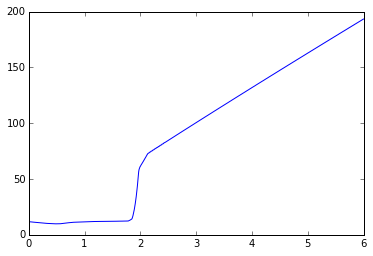

In [3]:
from math import exp, sqrt, pi

class vars:
  
    mu=0.6e0
    R=8.31e3
    fgamma=1.66666667e0
    ggg=-274.0e0
    mu=4*pi/1.0e7
    

def cs(var, p, rho):
    vcs=sqrt(vars.fgamma*p/rho)
    return vcs

ptemp=numpy.float64(data[1:2048,3])
rhotemp=numpy.float64(data[1:2048,2])

asize=data.size
print asize
acs = numpy.zeros(asize/4)
for i in range(0,(asize/4)-1):
    acs[i]=cs(vars,ptemp[i],rhotemp[i]);
    
print acs.size
print height.size
plt.plot(height/1.0e6,acs/1000)

##Functions to compute sound speed analog and gradient from best fits


$$ \frac{d}{dz}\frac{P}{\rho g}$$

In [9]:
from math import exp, sqrt, pi

def p_over_rhog(vars, h):
    poverrhog=0
    
    #region 1
    if h>=2.0419e6 and h<=6e6:
        poverrhog=177.4+1.349e-5*math.pow(h,1.886)
    #region2
    elif h>=1.802e6 and h<=2.039e6:
        p1=-4.415e-34
        p2=6.797e-27
        p3=-4.576e-20
        p4=1.76e-13
        p5=-4.228e-7
        p6=0.65
        p7=-6.243e5
        p8=3.426e11
        p9=-8.22e16
        poverrhog=p1*math.pow(h,8)+p2*math.pow(h,7)+p3*math.pow(h,6)+p4*math.pow(h,5)+p5*math.pow(h,4)+p6*math.pow(h,3)+p7*math.pow(h,2)+p8*h+p9            
    #region3
    elif h>=8.7e3 and h<1.7991e6:
        p1=1.37e-42
        p2=-9.683e-36
        p3=2.732e-29
        p4=-3.894e-23
        p5=2.904e-17
        p6=-1.067e-11
        p7=1.973e-6
        p8=-0.4078
        p9=3.051e5
        poverrhog=p1*math.pow(h,8)+p2*math.pow(h,7)+p3*math.pow(h,6)+p4*math.pow(h,5)+p5*math.pow(h,4)+p6*math.pow(h,3)+p7*math.pow(h,2)+p8*h+p9            
                
    return math.fabs(poverrhog)


#compute derivative
def dp_over_rhog(vars, h):
    dpoverrhog=0
    
     #region 1
    if h>=2.0419e6 and h<=6e6:
        dpoverrhog=2.544214e-5*math.pow(h,0.886)
    #region2
    elif h>=1.802e6 and h<=2.039e6:
        p1=-4.415e-34
        p2=6.797e-27
        p3=-4.576e-20
        p4=1.76e-13
        p5=-4.228e-7
        p6=0.65
        p7=-6.243e5
        p8=3.426e11
        p9=-8.22e16
        #dpoverrhog=8*p1*math.pow(h,7)+7*p2*math.pow(h,6)+6*p3*math.pow(h,5)+5*p4*math.pow(h,4)+4*p5*math.pow(h,3)+3*p6*math.pow(h,2)+2*p7*h+p8                
        dpoverrhog=2.544214e-5*math.pow(h,0.886)
    #region3
    elif h>=8.7e3 and h<1.7991e6:
        p1=1.37e-42
        p2=-9.683e-36
        p3=2.732e-29
        p4=-3.894e-23
        p5=2.904e-17
        p6=-1.067e-11
        p7=1.973e-6
        p8=-0.4078
        p9=3.051e5
        dpoverrhog=8*p1*math.pow(h,7)+7*p2*math.pow(h,6)+6*p3*math.pow(h,5)+5*p4*math.pow(h,4)+4*p5*math.pow(h,3)+3*p6*math.pow(h,2)+2*p7*h+p8                
    return math.fabs(dpoverrhog)

## Function to compute the atmospheric scale parameter

2 5.9912238 1384908.33955
3 5.9882984 1384196.40103
4 5.985373 1383484.49303
5 5.9824476 1382772.61555
6 5.9795222 1382060.7686
7 5.9765968 1381348.95215
8 5.9736714 1379381.4141
9 5.970746 1378670.24962
10 5.9678206 1377959.11559
11 5.9648952 1377248.01201
12 5.9619698 1376536.88249
13 5.9590444 1374576.79202
14 5.956119 1373866.36891
15 5.9531936 1373155.97618
16 5.9502682 1372445.55748
17 5.9473428 1371735.22553
18 5.9444174 1371024.86757
19 5.941492 1369072.75038
20 5.9385666 1368363.09682
21 5.9356412 1367653.41725
22 5.9327157 1366943.81412
23 5.9297903 1366234.19517
24 5.9268649 1364289.3963
25 5.9239395 1363580.47978
26 5.9210141 1362871.53721
27 5.9180887 1362162.62488
28 5.9151633 1361453.79911
29 5.9122379 1360744.89093
30 5.9093125 1358808.04551
31 5.9063871 1358099.8941
32 5.9034617 1357391.71658
33 5.9005363 1356683.56924
34 5.8976109 1355975.45207
35 5.8946855 1354045.79674
36 5.8917601 1353338.37806
37 5.8888347 1352630.93325
38 5.8859093 1351923.51854
39 5.8829839 1351

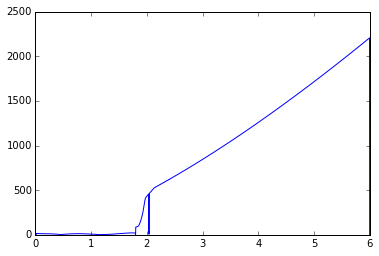

In [14]:
from math import exp, sqrt, pi





def lambda0(vars, P,rho):
    vlam0=P/(rho*vars.ggg)
    return vlam0

def lagrange_interp(xval,f,x,i): 
    t1=(xval-x[i])*(xval-x[i+1])/((x[i-1]-x[i])*(x[i-1]-x[i+1]))
    t2=(xval-x[i-1])*(xval-x[i+1])/((x[i]-x[i-1])*(x[i]-x[i+1]))
    t3=(xval-x[i-1])*(xval-x[i])/((x[i+1]-x[i-1])*(x[i+1]-x[i]))
    y=t1*f[i-1]+t2*f[i]+t3*f[i+1]
    return y

def diff5p(y,i,h):
    diff=(y[i-2]-8*y[i-1]+8*y[i+1]-y[i+2])/(12*h)
    return diff

def diff3p(y,i,h):
    diff=(y[i+1]-y[i-1])/(2*h)    
    return diff

#compute lambda0
alam0 = numpy.zeros(asize/4)
alami0 = numpy.zeros(asize/4)

for i in range(0,(asize/4)-1):
    alam0[i]=lambda0(vars,ptemp[i],rhotemp[i])

dh=height[0]-height[1]    
for i in range(1,(asize/4)-2):
    xval=height[0]-i*dh
    alami0[i]=lagrange_interp(xval,alam0,height,i)    
    
    
#print alam0  
#compute cutoff
atc0 = numpy.zeros(asize/4)
lamdash0 = numpy.zeros(asize/4)
for i in range(2,(asize/4)-4):
    h=height[i]-height[i+1]
    #lamdash0[i]=diff3p(alam0,i,h)
    #lamdash0[i]=ptemp[i]/rhotemp[i]
    lamdash0[i]=diff5p(alami0,i,h)
    #print h,alam0[i],lamdash0[i]
    #print h,ptemp[i],rhotemp[i],lamdash0[i]
    #atc0[i]=1.0/((vars.fgamma*vars.ggg/(4*pi*acs[i]))*math.sqrt(1+2*lamdash0[i]))
    #atc0[i]=-1.0/((vars.fgamma*vars.ggg/(4*pi*acs[i])))*math.sqrt(1+2*dp_over_rhog(vars, height[i]))
    atc0[i]=math.sqrt(-1.0/((vars.fgamma*vars.ggg/(2*acs[i]*acs[i])))*(1-vars.fgamma*vars.ggg*dp_over_rhog(vars, height[i])))
    print i,height[i]/1.0e6,atc0[i]
    #atc0[i]=math.sqrt(1+2*lamdash0[i])
    
#print atc0
plt.plot(height/1.0e6,atc0/(2*pi*100))


##References
Malins
Direct Propagation of Photospheric Acoustic p Modes into Nonmagnetic Solar Atmosphere
http://adsabs.harvard.edu/abs/2007SoPh..246...41M

Fleck, B.; Schmitz, F.
The 3-min oscillations of the solar chromosphere - A basic physical effect?
http://adsabs.harvard.edu/abs/1991A%26A...250..235F

Vernazza, J. E.; Avrett, E. H.; Loeser, R.
Structure of the solar chromosphere. III - Models of the EUV brightness components of the quiet-sun
http://adsabs.harvard.edu/abs/1981ApJS...45..635V

Roberts, B.
MHD Waves in the Solar Atmosphere
http://adsabs.harvard.edu/abs/2004ESASP.547....1R